In [48]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble, metrics 
from sklearn.model_selection import cross_validate, learning_curve
import numpy as np

In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
digits = load_digits()
digits.data.shape

<Figure size 432x288 with 0 Axes>

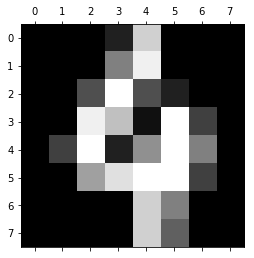

In [55]:
plt.gray() 
plt.matshow(digits.images[100]) 
plt.show()

In [31]:
def write_answer(answer, answer_n):
    path = './answer_{}.txt'.format(answer_n)
    with open(path, "w") as file_output:
        file_output.write(str(answer))

In [34]:
decision_tree = DecisionTreeClassifier()
score = cross_val_score(decision_tree, digits.data, digits.target, cv=10)

print score.mean()
write_answer(score.mean(), 1)

0.8235954917475425


In [33]:
bagging = BaggingClassifier(base_estimator=decision_tree, n_estimators=100)
score = cross_val_score(bagging, digits.data, digits.target, cv=10)

print score.mean()
write_answer(score.mean(), 2)

0.9243905906494916


In [40]:
features_sqrt = int(digits.data.shape[1] ** 0.5)
bagging = BaggingClassifier(base_estimator=decision_tree, max_features=features_sqrt, n_estimators=100)
score = cross_val_score(bagging, digits.data, digits.target, cv=10)

print score.mean()
write_answer(score.mean(), 3)

0.9254252053467183


In [43]:
features_sqrt = int(digits.data.shape[1] ** 0.5)
decision_tree = DecisionTreeClassifier(max_features=features_sqrt)
bagging = BaggingClassifier(base_estimator=decision_tree, max_features=1.0, n_estimators=100)
score = cross_val_score(bagging, digits.data, digits.target, cv=10)

print score.mean()
write_answer(score.mean(), 4)

0.9494560365150543


In [46]:
random_forest = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 1)

In [49]:
train_sizes, train_scores, test_scores = learning_curve(random_forest, digits.data, digits.target, 
                                                                       train_sizes=np.arange(0.1,1, 0.2), 
                                                                       cv=3, scoring='accuracy')

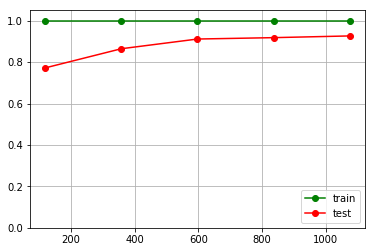

In [52]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')